In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings

In [4]:
from sklearn.datasets import make_blobs

In [5]:
warnings.filterwarnings("ignore")

In [6]:
## Use only for colab
# from  google.colab import  files 
# upload=  files.upload()

In [7]:
# df  = pd.read_csv("Mall_Customers.csv")
df  = pd.read_csv("datasets/Mall_Customers.csv")

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.shape

(200, 5)

In [11]:
df.drop("CustomerID", axis=1, inplace=True)

In [12]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [13]:
kmeans  = KMeans(n_clusters=2, init="k-means++")

In [14]:
%matplotlib inline

In [15]:
X, y = make_blobs(n_samples=100, random_state=100)

In [16]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [17]:
kmeans.inertia_

2117.3888507324705

In [18]:
SSE = []

In [19]:
for c in range(1,20):
  kmeans  = KMeans( n_clusters=c, init="k-means++")
  kmeans.fit(X)
  SSE.append(kmeans.inertia_)

In [20]:
frame = pd.DataFrame({"Cluster":range(1,20), "SSE":SSE})

Text(0, 0.5, 'Inertia')

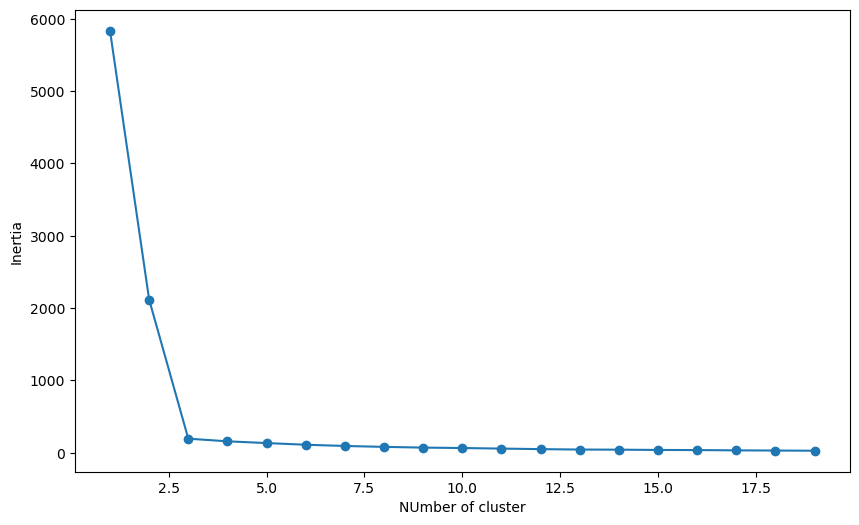

In [21]:
plt.figure(figsize=(10,6))
plt.plot(frame["Cluster"], frame["SSE"], marker="o")
plt.xlabel("NUmber of cluster")
plt.ylabel("Inertia")


In [22]:
def kmeans_fun(no_cluster, df):
  kmeans  = KMeans( n_clusters=no_cluster, init="k-means++")
  kmeans.fit(df)
  pred = kmeans.predict(df)
  kmeans.cluster_centers_
  return (pred, kmeans.cluster_centers_)

In [23]:
X, y = make_blobs(n_samples=100, random_state=100)

In [24]:
kmeans_fun(3, X)

(array([2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2,
        2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2,
        1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2], dtype=int32),
 array([[-9.52981151, -7.69781936],
        [-1.72134158,  6.61045437],
        [ 0.70353328, -4.52767455]]))

In [25]:
pred_3, cen_3 = kmeans_fun(3, X)
pred_4, cen_4 = kmeans_fun(4, X)
pred_5, cen_5 = kmeans_fun(5, X)
pred_6, cen_6 = kmeans_fun(6, X)
pred_7, cen_7 = kmeans_fun(7, X)

In [26]:
unipue , counts  = np.unique(pred_3, return_counts = True)
print(np.asarray((unipue,counts)).T)

[[ 0 33]
 [ 1 34]
 [ 2 33]]


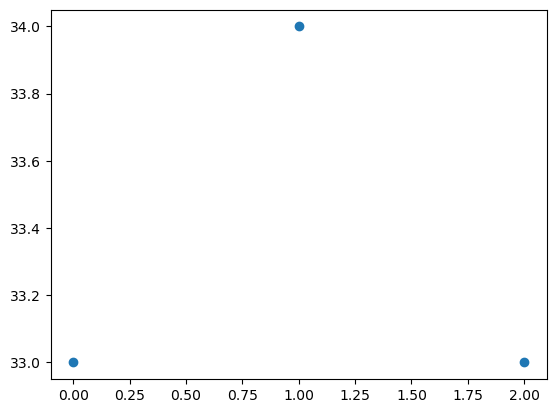

In [27]:
df_scaled = np.array(X)
td  = np.array(X)
plt.scatter(unipue, counts)

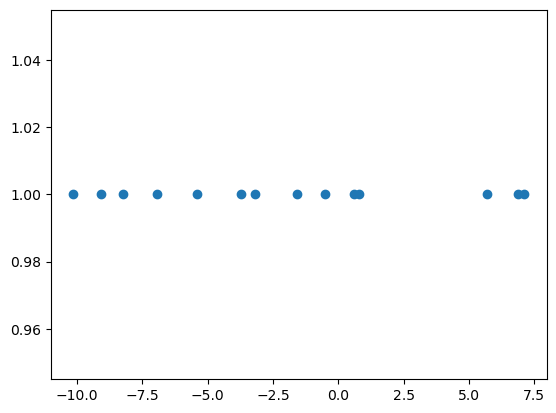

In [28]:
unipue , counts  = np.unique(cen_7, return_counts = True)
plt.scatter(unipue, counts)